In [2]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## SVM

Accuracy: 0.9860917941585535


<Figure size 640x480 with 0 Axes>

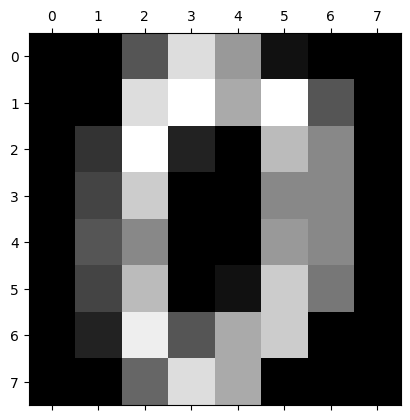

In [3]:
    digits = load_digits()
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)
    svm=SVC()
    svm.fit(X_train, y_train)

    accuracy = svm.score(X_test, y_test)
    print(f"Accuracy: {accuracy}")

    plt.gray()
    plt.matshow(digits.images[0])

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
y_predict=svm.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 82  1  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  2  0  0  0  0  0  0 62  1]
 [ 0  0  0  1  0  0  0  1  1 74]]


In [6]:
from sklearn.metrics import classification_report

In [7]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       0.99      0.99      0.99        71
           8       0.97      0.95      0.96        65
           9       0.97      0.96      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



### SVC mit Parameter Optimierung(einfach)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, 

<Figure size 640x480 with 0 Axes>

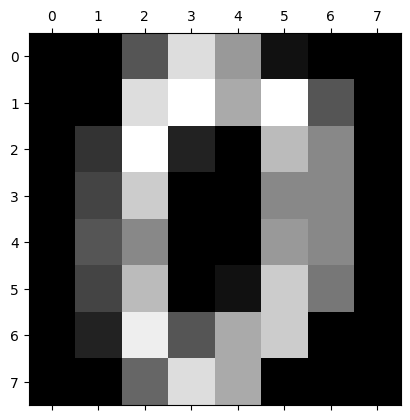

In [8]:

# GridSearchCV für die Optimierung von Hyperparametern
param_grid = {
    'C': [0.1, 1, 10, 100,50],
    'gamma': [0.001, 0.01, 0.1, 1,0.002,0.0015,0.0009],
    'kernel': ['rbf', 'poly', 'sigmoid','linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(f"Beste Parameter: {grid.best_params_}")

accuracy = grid.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

plt.gray()
plt.matshow(digits.images[0])

In [9]:
from sklearn.metrics import confusion_matrix
y_predict=grid.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  0  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  1  0 75]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))
print(grid.score(X_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        78
           5       0.99      1.00      0.99        83
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       0.98      1.00      0.99        65
           9       0.99      0.97      0.98        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

0.9930458970792768


## Enscheidungsbaum

In [11]:
from sklearn import tree

In [12]:
dtc=tree.DecisionTreeClassifier()

In [13]:
dtc.fit(X_train,y_train)
y_predict=dtc.predict(X_test)

In [14]:
print(confusion_matrix(y_test,y_predict))

[[62  0  0  0  1  1  1  1  1  0]
 [ 0 55  5  2  3  0  2  0  4  1]
 [ 0  3 53  2  0  1  1  0  6  0]
 [ 0  3  2 54  1  0  1  1  5  4]
 [ 2  1  0  0 67  0  4  4  0  0]
 [ 0  0  0  0  6 73  0  2  0  2]
 [ 0  1  4  0  1  1 62  0  0  0]
 [ 0  1  0  3  1  0  1 64  0  1]
 [ 0  5  0  2  1  0  0  0 54  3]
 [ 1  3  0  1  3  2  1  1  0 65]]


In [15]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.76      0.76      0.76        72
           2       0.83      0.80      0.82        66
           3       0.84      0.76      0.80        71
           4       0.80      0.86      0.83        78
           5       0.94      0.88      0.91        83
           6       0.85      0.90      0.87        69
           7       0.88      0.90      0.89        71
           8       0.77      0.83      0.80        65
           9       0.86      0.84      0.85        77

    accuracy                           0.85       719
   macro avg       0.85      0.85      0.85       719
weighted avg       0.85      0.85      0.85       719



In [16]:
print(dtc.score(X_test,y_test))

0.847009735744089


### Raum-verkleinernung

In [17]:
# Informationsgehalt der einzelen Merkmale für den Entscheiungsbaum
print(dtc.feature_importances_)
informationGainArray=dtc.feature_importances_
loserIndex=[n for n in range(len(informationGainArray)) if informationGainArray[n] == 0]
print(loserIndex)

[0.         0.0010309  0.0010309  0.00282761 0.00452944 0.04736301
 0.         0.         0.         0.00335042 0.04268167 0.00154635
 0.00187436 0.00813757 0.         0.         0.         0.00309269
 0.00794815 0.01592107 0.04903125 0.08028094 0.         0.
 0.         0.00713073 0.07509518 0.04899568 0.00493785 0.01727538
 0.0010309  0.         0.         0.05732091 0.01293815 0.00412359
 0.07666516 0.03008273 0.02157167 0.         0.         0.
 0.12929549 0.07364866 0.01459274 0.00517904 0.00534138 0.
 0.         0.         0.00999971 0.00441814 0.01493607 0.014326
 0.02036344 0.         0.         0.0010309  0.00164944 0.00356155
 0.05990732 0.00631258 0.00447332 0.00314997]
[0, 6, 7, 8, 14, 15, 16, 22, 23, 24, 31, 32, 39, 40, 41, 47, 48, 49, 55, 56]


In [18]:
digits_klein=pd.DataFrame(digits.data)

In [19]:
digits_klein.drop(columns=loserIndex)

,1,2,3,4,5,9,10,11,12,13,...,52,53,54,57,58,59,60,61,62,63
0,0.0,5.0,13.0,9.0,1.0,0.0,13.0,15.0,10.0,15.0,...,10.0,12.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,12.0,13.0,5.0,0.0,0.0,11.0,16.0,9.0,...,16.0,6.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,4.0,15.0,12.0,0.0,3.0,16.0,15.0,14.0,...,16.0,11.0,5.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,7.0,15.0,13.0,1.0,8.0,13.0,6.0,15.0,4.0,...,5.0,14.0,9.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,1.0,11.0,0.0,0.0,0.0,7.0,8.0,0.0,...,15.0,10.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,4.0,10.0,13.0,6.0,1.0,16.0,14.0,12.0,16.0,...,7.0,16.0,4.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,6.0,16.0,13.0,11.0,0.0,16.0,15.0,12.0,16.0,...,16.0,16.0,1.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,1.0,11.0,15.0,1.0,0.0,13.0,16.0,8.0,2.0,...,15.0,16.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,2.0,10.0,7.0,0.0,0.0,14.0,16.0,16.0,15.0,...,7.0,16.0,2.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [20]:
X_train_klein, X_test_klein, y_train_klein, y_test_klein = train_test_split(digits_klein, digits.target, test_size=0.4, random_state=42)
dtcKlein=tree.DecisionTreeClassifier()
dtcKlein.fit(X_train_klein,y_train_klein)
y_predict=dtcKlein.predict(X_test_klein)


In [21]:
print(confusion_matrix(y_test,y_predict))

[[61  0  2  0  3  1  0  0  0  0]
 [ 0 57  3  4  2  0  0  0  4  2]
 [ 0  1 55  2  0  1  1  0  6  0]
 [ 0  1  3 54  3  0  1  1  5  3]
 [ 1  0  0  0 69  1  5  1  1  0]
 [ 0  2  0  0  3 75  2  0  1  0]
 [ 0  1  4  1  1  0 62  0  0  0]
 [ 0  1  0  3  3  0  0 63  0  1]
 [ 0  5  1  1  4  0  0  0 53  1]
 [ 1  5  0  2  3  4  0  0  0 62]]


In [22]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        67
           1       0.78      0.79      0.79        72
           2       0.81      0.83      0.82        66
           3       0.81      0.76      0.78        71
           4       0.76      0.88      0.82        78
           5       0.91      0.90      0.91        83
           6       0.87      0.90      0.89        69
           7       0.97      0.89      0.93        71
           8       0.76      0.82      0.79        65
           9       0.90      0.81      0.85        77

    accuracy                           0.85       719
   macro avg       0.85      0.85      0.85       719
weighted avg       0.85      0.85      0.85       719



In [23]:
print(dtcKlein.score(X_test_klein,y_test_klein))

0.8497913769123783


In [24]:
grid.fit(X_train_klein,y_train_klein)
y_predict=grid.predict(X_test_klein)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

In [25]:
print(classification_report(y_predict,y_test_klein))
print(confusion_matrix(y_test_klein,y_predict))
print(grid.score(X_test_klein,y_test_klein))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        66
           3       0.97      0.99      0.98        70
           4       1.00      1.00      1.00        78
           5       1.00      0.99      0.99        84
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       1.00      0.98      0.99        66
           9       0.97      0.99      0.98        76

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0

## Datenanalayse

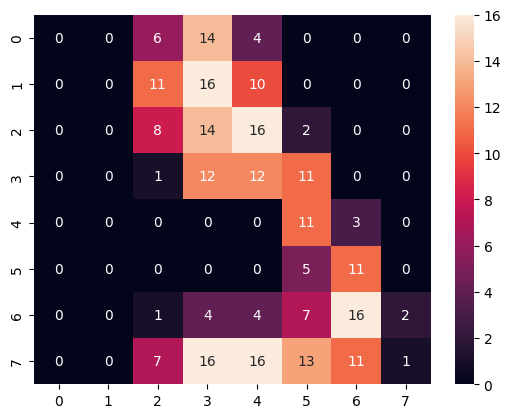

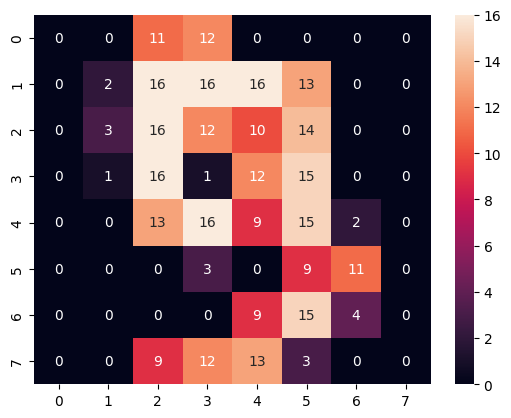

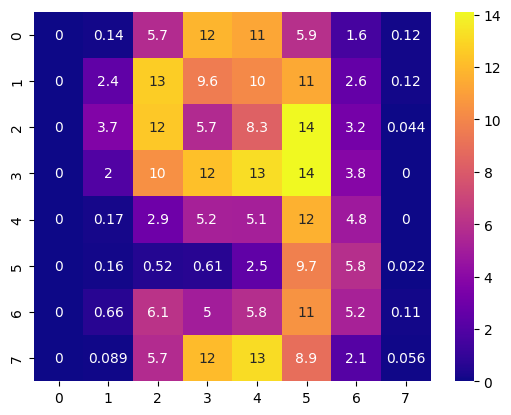

In [29]:
#Config für Magic shit can be Touched
Ziffer=9

#Magic shit dont Touch it
breite=8
labelsample = [[np.array(digits.data[c][n:n+breite]) for n in range(0, len(digits.data[c]), breite)] for c in range(len(digits.data)) if digits.target[c] == Ziffer]
labelgesamt=[[sum(row[i] for row in [np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]) / len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]) for i in range(len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer][0]))][c:c+breite] for c in range(0, len([sum(row[i] for row in [np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]) / len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]) for i in range(len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer][0]))]), breite)]

"""
labelgesamt=[np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]
gesamt=[]
for i in range(len(labelgesamt[0])):
    gesamt.append(sum([row[i] for row in labelgesamt])/len(labelgesamt))

gesamt2 = [sum(row[i] for row in labelgesamt) / len(labelgesamt) for i in range(len(labelgesamt[0]))]
test=[gesamt2[c:c+breite] for c in range(0, len(gesamt2), breite)]
"""

sns.heatmap(labelsample[1], annot=True)
plt.show()
sns.heatmap(labelsample[0],annot=True)
plt.show()
sns.heatmap(labelgesamt,annot=True,cmap="plasma")
plt.show()